##### Jueves 5 de Septiembre 2024 
##### Aline Rockenzahn 

# <div align ="center"> T03-SYMPY

**Resuelve los siguientes problemas usando sympy:** 

**1. El perímetro de un triángulo isósceles es de 20 cm. Imagina que este triángulo rota centrado en su eje de simetría para formar la ilusión de un cono.** 

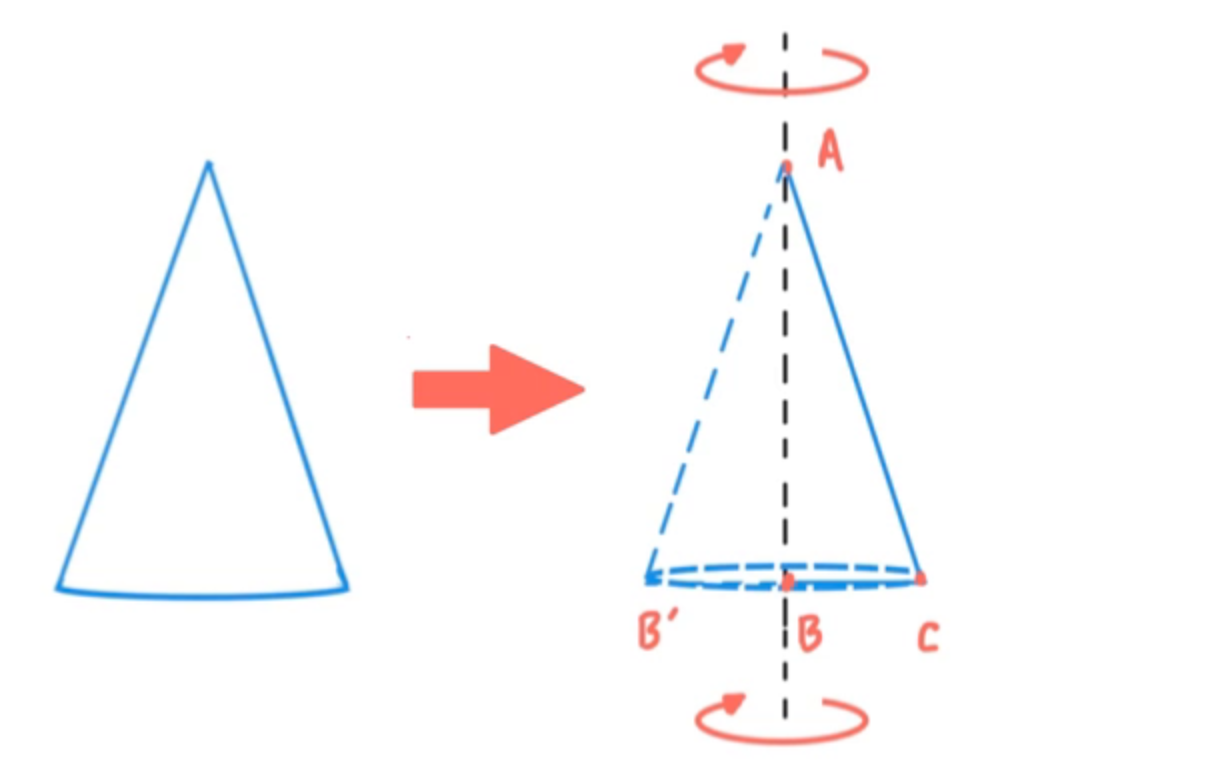

**¿Cuánto deben medir sus lados para que el volumen generado por la rotación sea el mayor posible** 

La ecuación matemática del perímetro se vería así: 

$$2L + l = 20$$ 

Lo que queremos maximizar es el volúmen del tríangulo como si fuera un "cono": (para escribir pi en markdown es con \pi  

$$V=(\pi*h*r^2)/3$$ 

Yo no sé los valores de h y r, así que son variables, pero los puedo poner en función de las variables de los lados. De igual manera puedo poner una de las variables de los lados en función de la otra, para tener sólo una variable en todas mis ecuaciones: 
Para raíz cuadrada en markdown es \sqrt{ } 
Para fracción es: \frac{ }{ } 

$$r=\frac{1}{2}l$$
$$h=\sqrt{L^2-(\frac{1}{2}l)^2}$$

Variable del lado chico en función del lado grande: 

$$l=20-2L$$

$$r=\frac{1}{2}(20-2L)$$
$$h=\sqrt{L^2-(\frac{1}{2}(20-2L))^2}$$

Ahora quiero derivar mi ecuación de volúmen con respecto a L: 

In [354]:
import sympy as sp 
import math 
l=sp.var("l")  
L=sp.var("L") 
h=sp.var("h") 
#Tengo que definir las funciones y luego derivar el volúmen con sympy 
Ec_l = 20-2*L 
Ec_l 

20 - 2*L

In [359]:
r=sp.var("r") 
Ec_2=1/2*l
Ec_r = Ec_2.subs(l,Ec_l )
Ec_r

10.0 - 1.0*L

In [379]:
Ec_h = sp.sqrt((L**2)-(Ec_l/2)**2)
Ec_h

sqrt(L**2 - (10 - L)**2)

Con esto ya tengo definidas todas mis variables, y todas están en función de "L". Ahora defino mi ec de Volúmen que es la que voy a derivar e igualar a 0 

In [395]:
V=sp.var("V")
Ec_vol = 1/3*sp.pi*Ec_h*(Ec_r)**2 
Ec_vol 

33.3333333333333*pi*(1 - 0.1*L)**2*sqrt(L**2 - (10 - L)**2)

In [397]:
derivada_vol =sp.diff(Ec_vol,L)
derivada_vol

333.333333333333*pi*(1 - 0.1*L)**2/sqrt(L**2 - (10 - L)**2) + 33.3333333333333*pi*(0.02*L - 0.2)*sqrt(L**2 - (10 - L)**2)

In [399]:
valor_L =sp.solve(derivada_vol,L) 
valor_L 


[6.00000000000000, 10.0000000000000]

In [456]:
valor_L[0] 

6.00000000000000

In [486]:
L=sp.var("L") 
Valor_l = Ec_l.subs(L,valor_L[0]) 
Valor_l


8.00000000000000

Para que el volúmen del cóno sea el óptimo, el valor del lado l debe ser 8 y el valor del lado L debe ser 6 

In [511]:
def volumen(L):
    return (1/3) * np.pi * np.sqrt(20*L - 100) * (10 - L)**2
volumen(6)

74.93135713110108

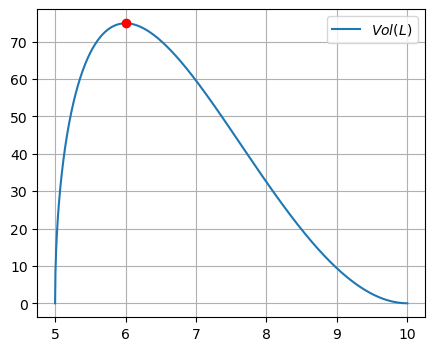

In [513]:
import matplotlib.pyplot as plt 
import numpy as np 

L = np.linspace(5, 10, 1000) #Esta variable es como los arreglos en matlab, el formato es primero el valor de inicio, luego el final, y al último los espacios que queremos entre cada valor 
#No salia la gráfica pq habías puesto el arreglo como (0,30,100)....no entiendo cómo sabemos el rango y los espacios que hay que usar en estos arreglos al graficar 
#y = 1/3*np.pi*np.sqrt((L**2)-((10-L)**2))*((10-L)**2)

def volumen(L):
    return (1/3) * np.pi * np.sqrt(20*L - 100) * (10 - L)**2

plt.figure(figsize=(5, 4)) 
plt.plot(L, volumen(L),label=r'$Vol(L)$')
plt.plot(valor_L[0],volumen(6),'ro')
plt.grid(True)  
plt.legend()

plt.show()

**2. Disponemos de una barra de aluminio de 6 metros para construir una portería de fútbol en un parque. Es una portería simple que tendrá sólo dos postes y el travesaño:** 

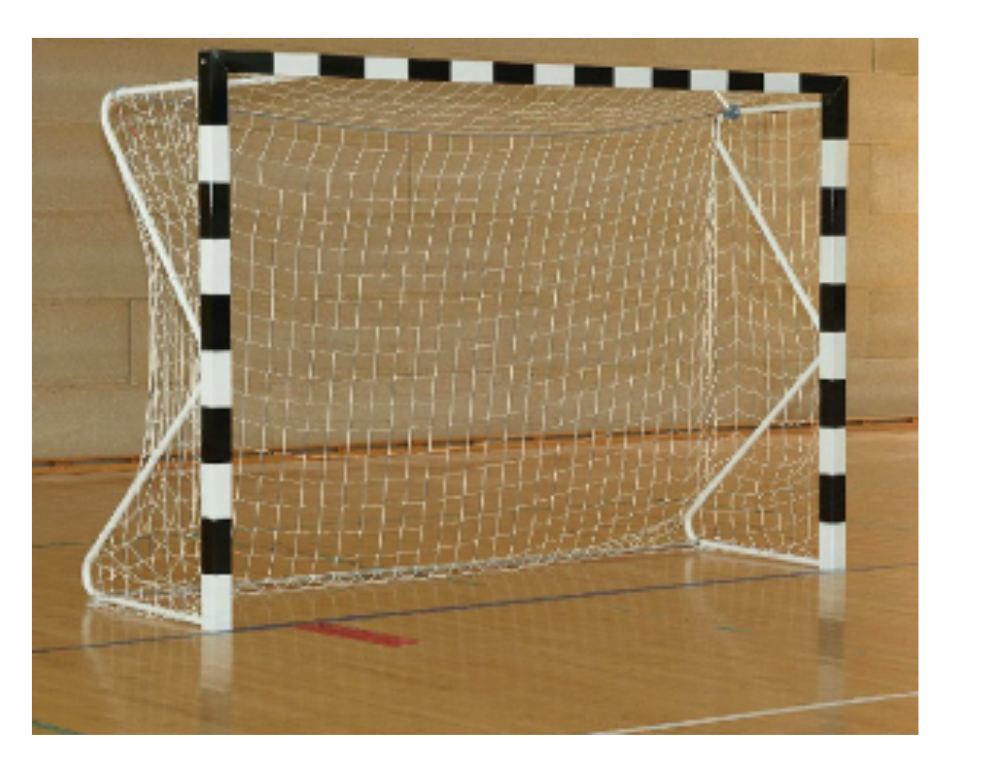

**Si queremos que el área de la portería sea máxima, ¿cuánto deben medir los postes y el travesaño?** 

Como tengo 6m de material, y tengo que construir 3 postes, la ecuación matemática se vería así: 
$$2l + L = 6$$ 

Lo que queremos maximizar es el área, y la ecuación del área es: 
$$(l)(L)=A$$ 

Sin embargo, para maximizar una función necesito que ésta sólo dependa de una variable. Por lo que para el área, podría poner una de las variables en función de la otra. 

In [208]:
import sympy as sp 
l=sp.var("l")  
L=sp.var("L") 
A=sp.var("A")
L_despejada = sp.solve(2*l+L-6,L) 
L_despejada 

[6 - 2*l]

Sustituyo lo que vale la L en la ecuación del área: 

In [210]:
Ec_area = (l*L)
Ec_area_en_funcion_de_l= Ec_area.subs(L,L_despejada[0]) 
Ec_area_en_funcion_de_l

l*(6 - 2*l)

Ya tengo mi función del área que depende sólo de una variable que puedo optimizar: 
$$l(6-2l)=A$$ 

Ahora voy a derivar esta función con sympy: 

In [180]:
derivada_area = sp.diff(Ec_area_en_funcion_de_l,l)
derivada_area

6 - 4*l

In [214]:
Valor_l = sp.solve(derivada_area,l) 
Valor_l 

[3/2]

Ahora derivo la derivada para ver si es máximo o mínimo: 

In [186]:
Segunda_deri = sp.diff(derivada_area,l)
Segunda_deri 


-4

Como es menor que 0, es un punto máximo. 
Lo puedo comprobar con una gráfica: 

In [192]:
funcion_area = l*(6-2*l)
#type(l) 
valor_y = funcion_area.subs(l,Valor_l[0])
valor_y

9/2

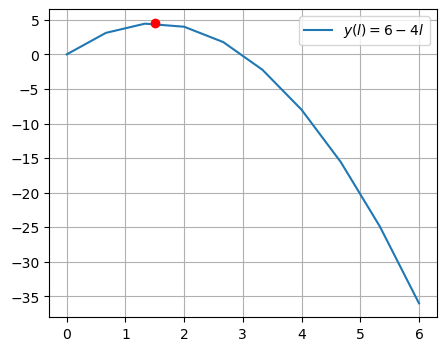

In [194]:
import matplotlib.pyplot as plt 
import numpy as np 

l = np.linspace(0, 6, 10) #Esta variable es como los arreglos en matlab, el formato es primero el valor de inicio, luego el final, y al último los espacios que queremos entre cada valor 
y = 6*l - 2*(l**2)


plt.figure(figsize=(5, 4)) 
plt.plot(l, y, label=r'$y(l)=6-4l$')
plt.plot(Valor_l[0], valor_y,'ro')


  
plt.grid(True)  


plt.legend()

plt.show()

Ahora conociendo el valor de l y habiendo confirmado qué el punto en mi gráfica si es el área máxima, toca encontrar el valor del lado grande "L": 

In [218]:
Valor_L = L_despejada[0].subs(l,Valor_l[0]) #AWASSSSS NO PUEDES USAR LA FUNCIÓN SUBS DE SYMPY CON NINGÚN NÚMERO, SIEMPRE TU VALOR QUE SUSTITUYES SI ES UN NUM DEBE SER ALGO QUE SACASTE DE OTRA COSA, UN SÍMBOLO
Valor_L 

3

La respuesta final es que para que el área de la portería sea máxima, la medida de los postes es de 1.5m y la del travesaño es de 3m 

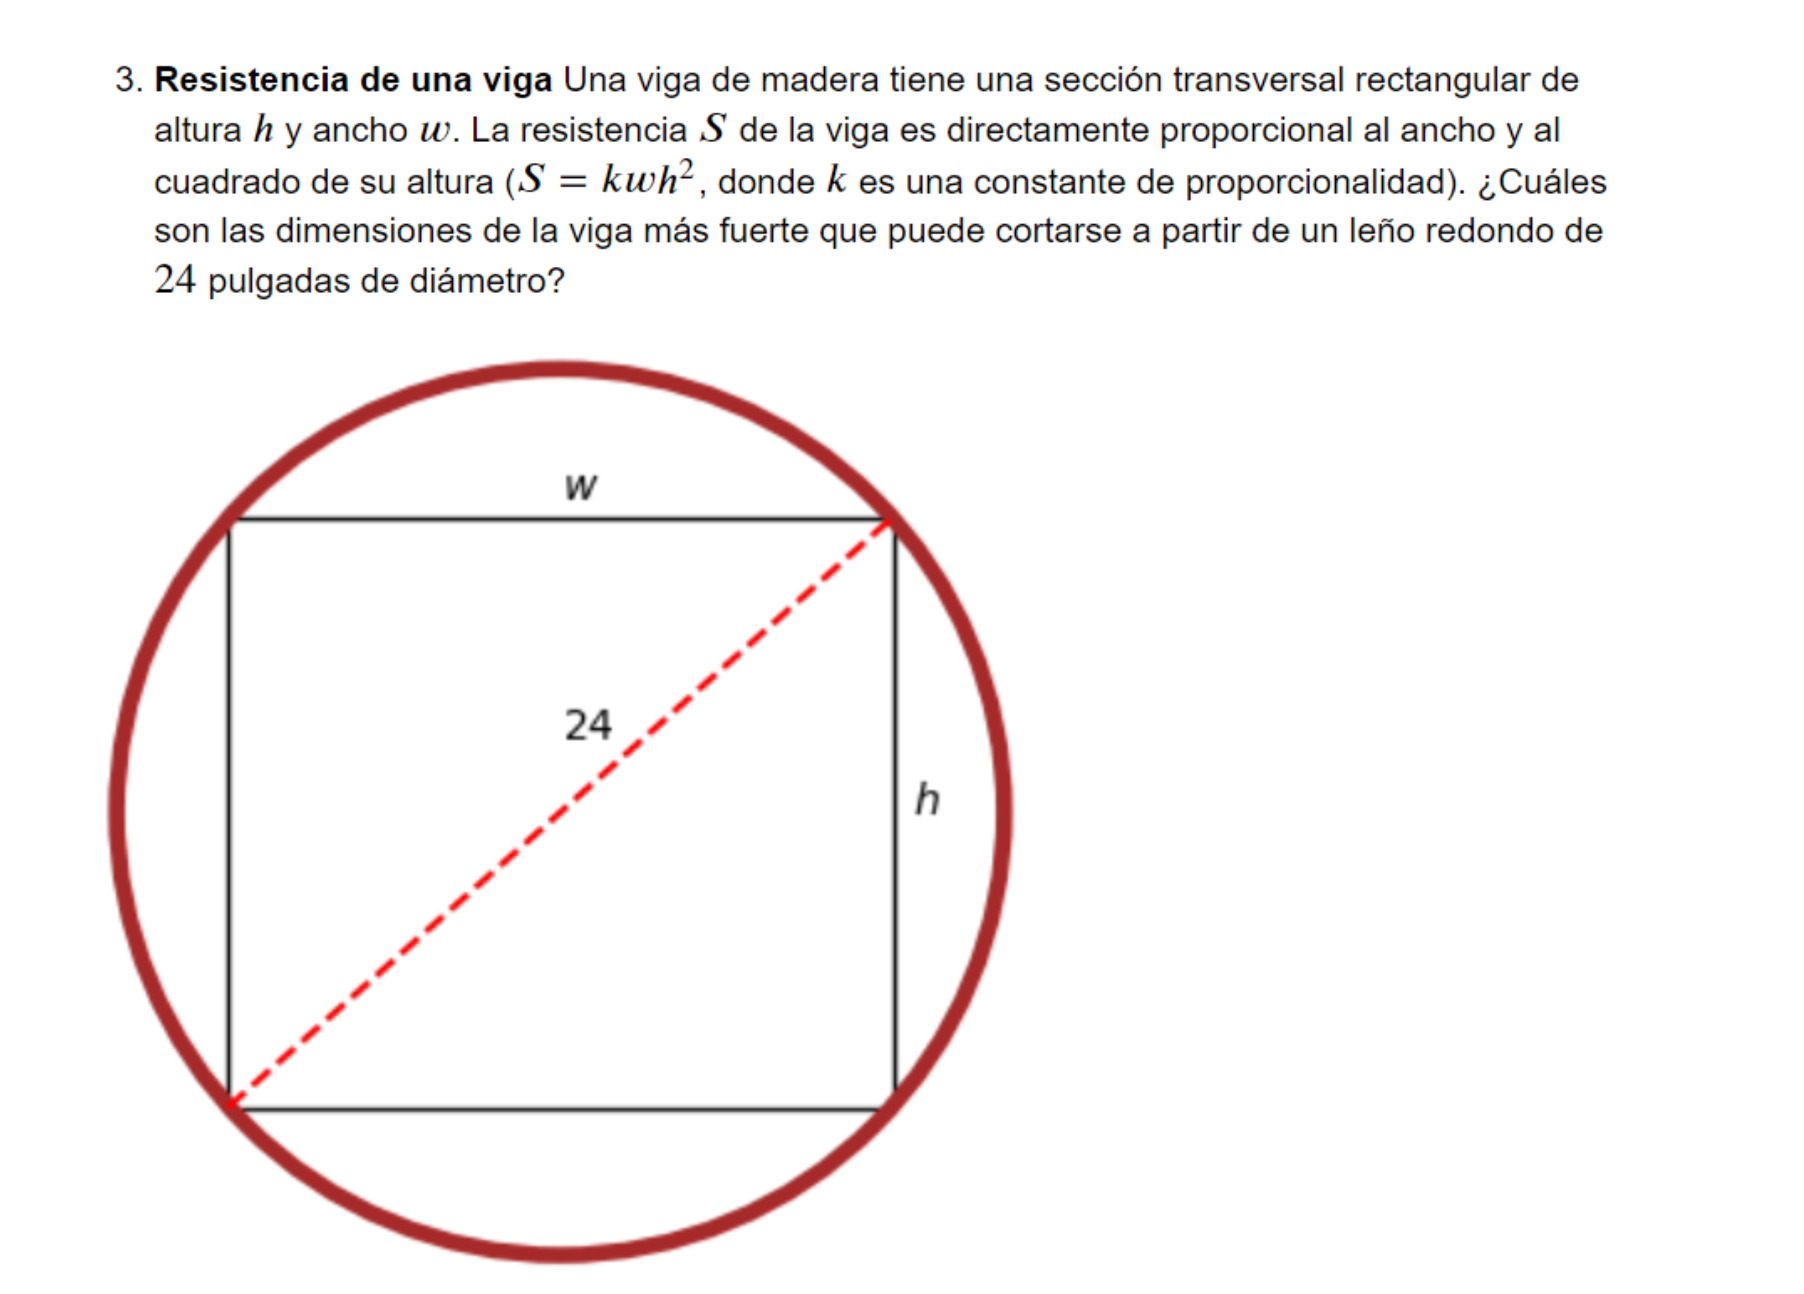

In [531]:
import sympy as sp


h, w = sp.var('h w')
S = w * h**2

Ec_1 = sp.Eq((24/2)**2, (w/2)**2 + (h/2)**2)

Ec_w = sp.solve(Ec_1, w)[1] 
Ec_s = S.subs(w, Ec_w)

derivada = sp.diff(Ec_s, h)
valores_h = sp.solve(derivada, h)
valor_h = valores_h[2]
valor_h 


19.5959179422654

In [541]:
Ec_3 = w**2 +(valor_h)**2-(24)**2
valores_w = sp.solve(Ec_3,w)
#valores_w 
valor_w = valores_w[1] 
valor_w 

13.8564064605510

In [543]:
S_con_w = S.subs(w,valor_w) 
S_tmbn_con_h = S_con_w.subs(h,valor_h )
S_tmbn_con_h

5320.86008085159

In [551]:
print("Las dimensiones óptimas de la viga son: w =" + str(valor_w ) + " h= " +str(valor_h ) +" lo cual da una resistencia =" +str(S_tmbn_con_h))

Las dimensiones óptimas de la viga son: w =13.8564064605510 h= 19.5959179422654 lo cual da una resistencia =5320.86008085159


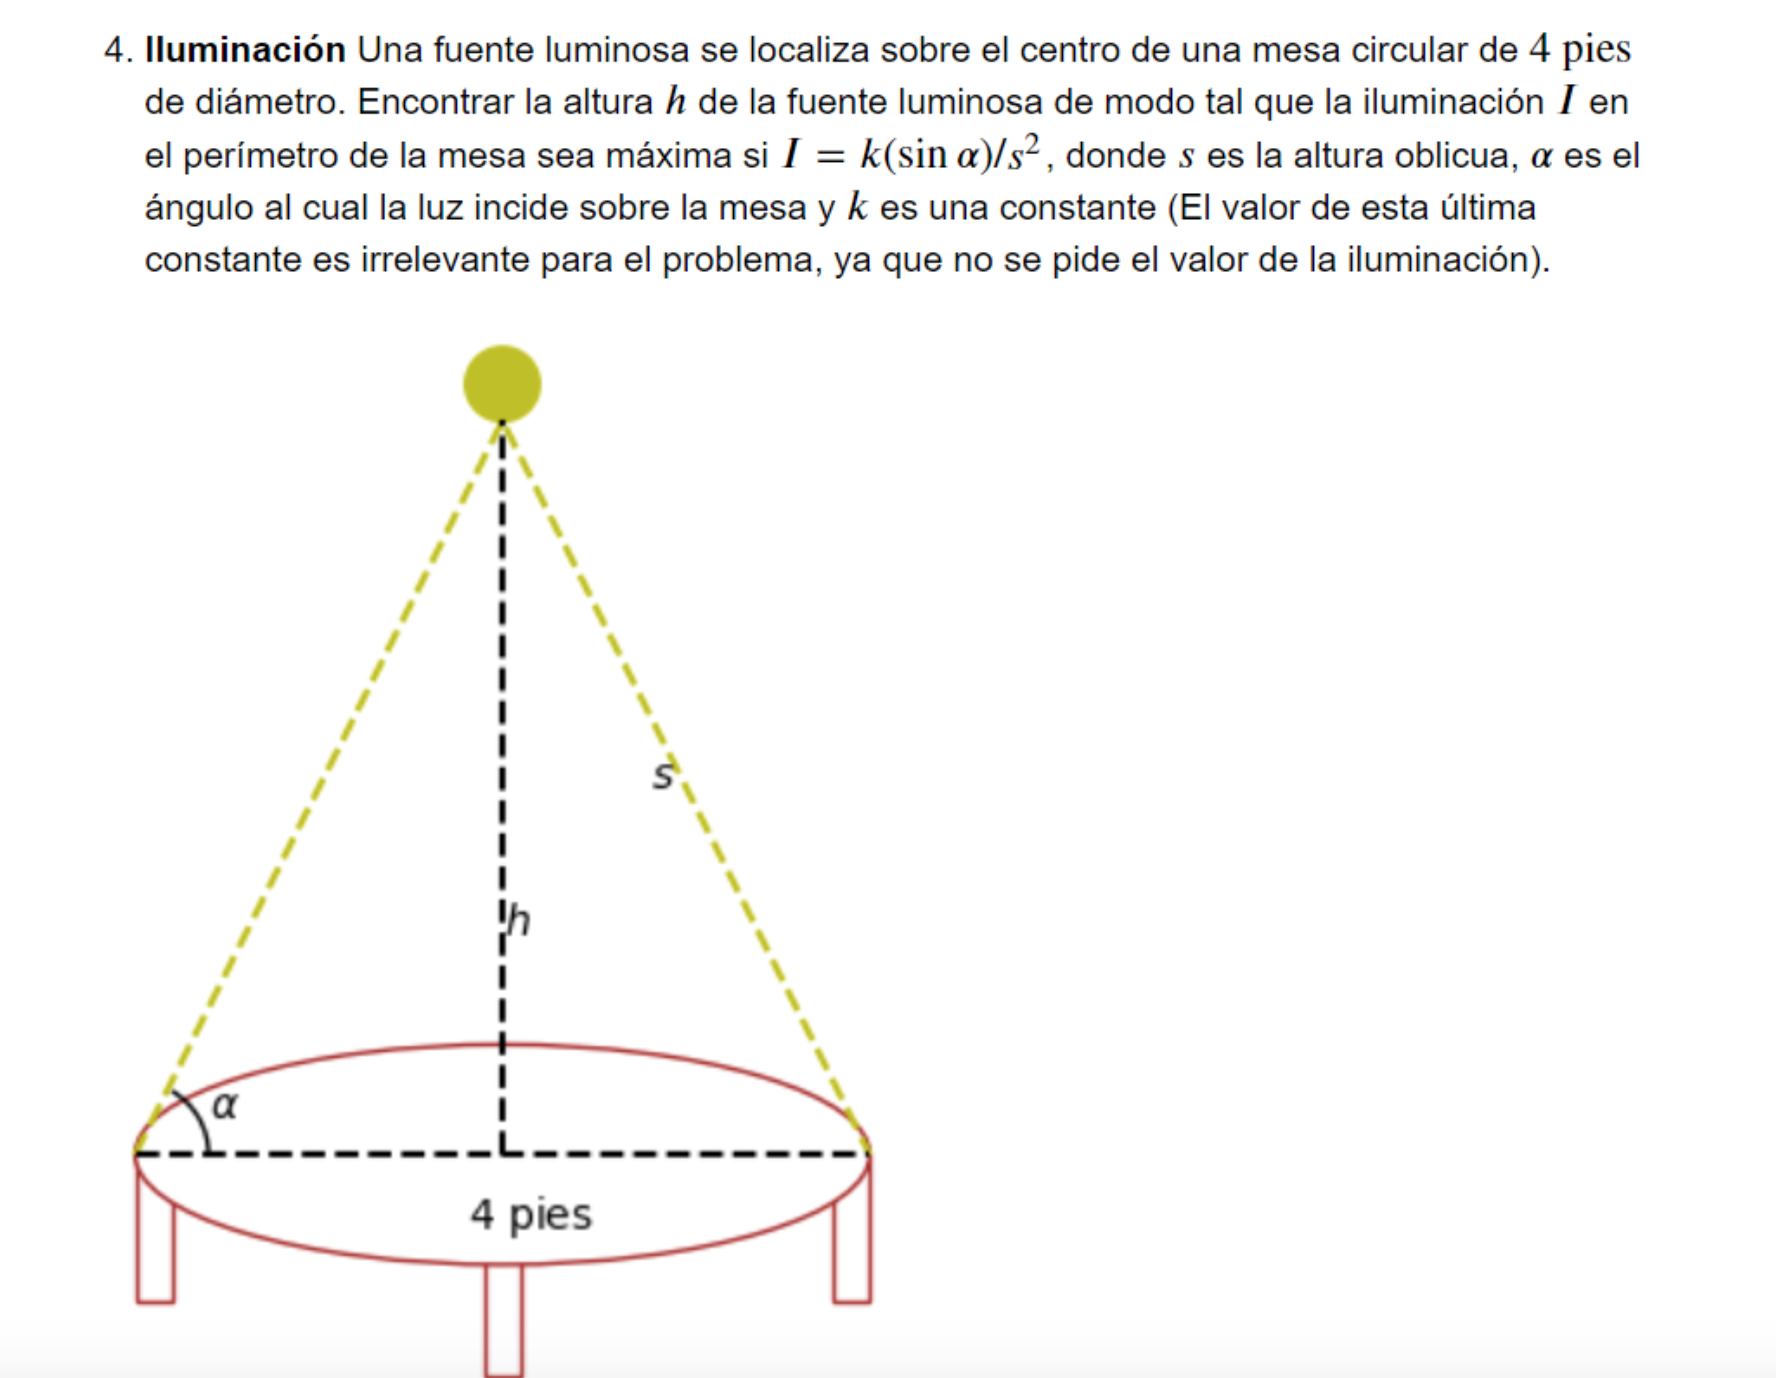

In [553]:
import sympy as sp
sp.var('h')
def I(h):
  return h/(h**2+4)**1.5
I(h)
derivada_I=sp.diff(I(h),h)
c=sp.solve(derivada_I,h)
c[1]

1.41421356237310

In [555]:
I(c[1])

0.0962250448649376

Los valores óptimos son:h= 1.14 mientras que la iluminación máxima es I=0.09

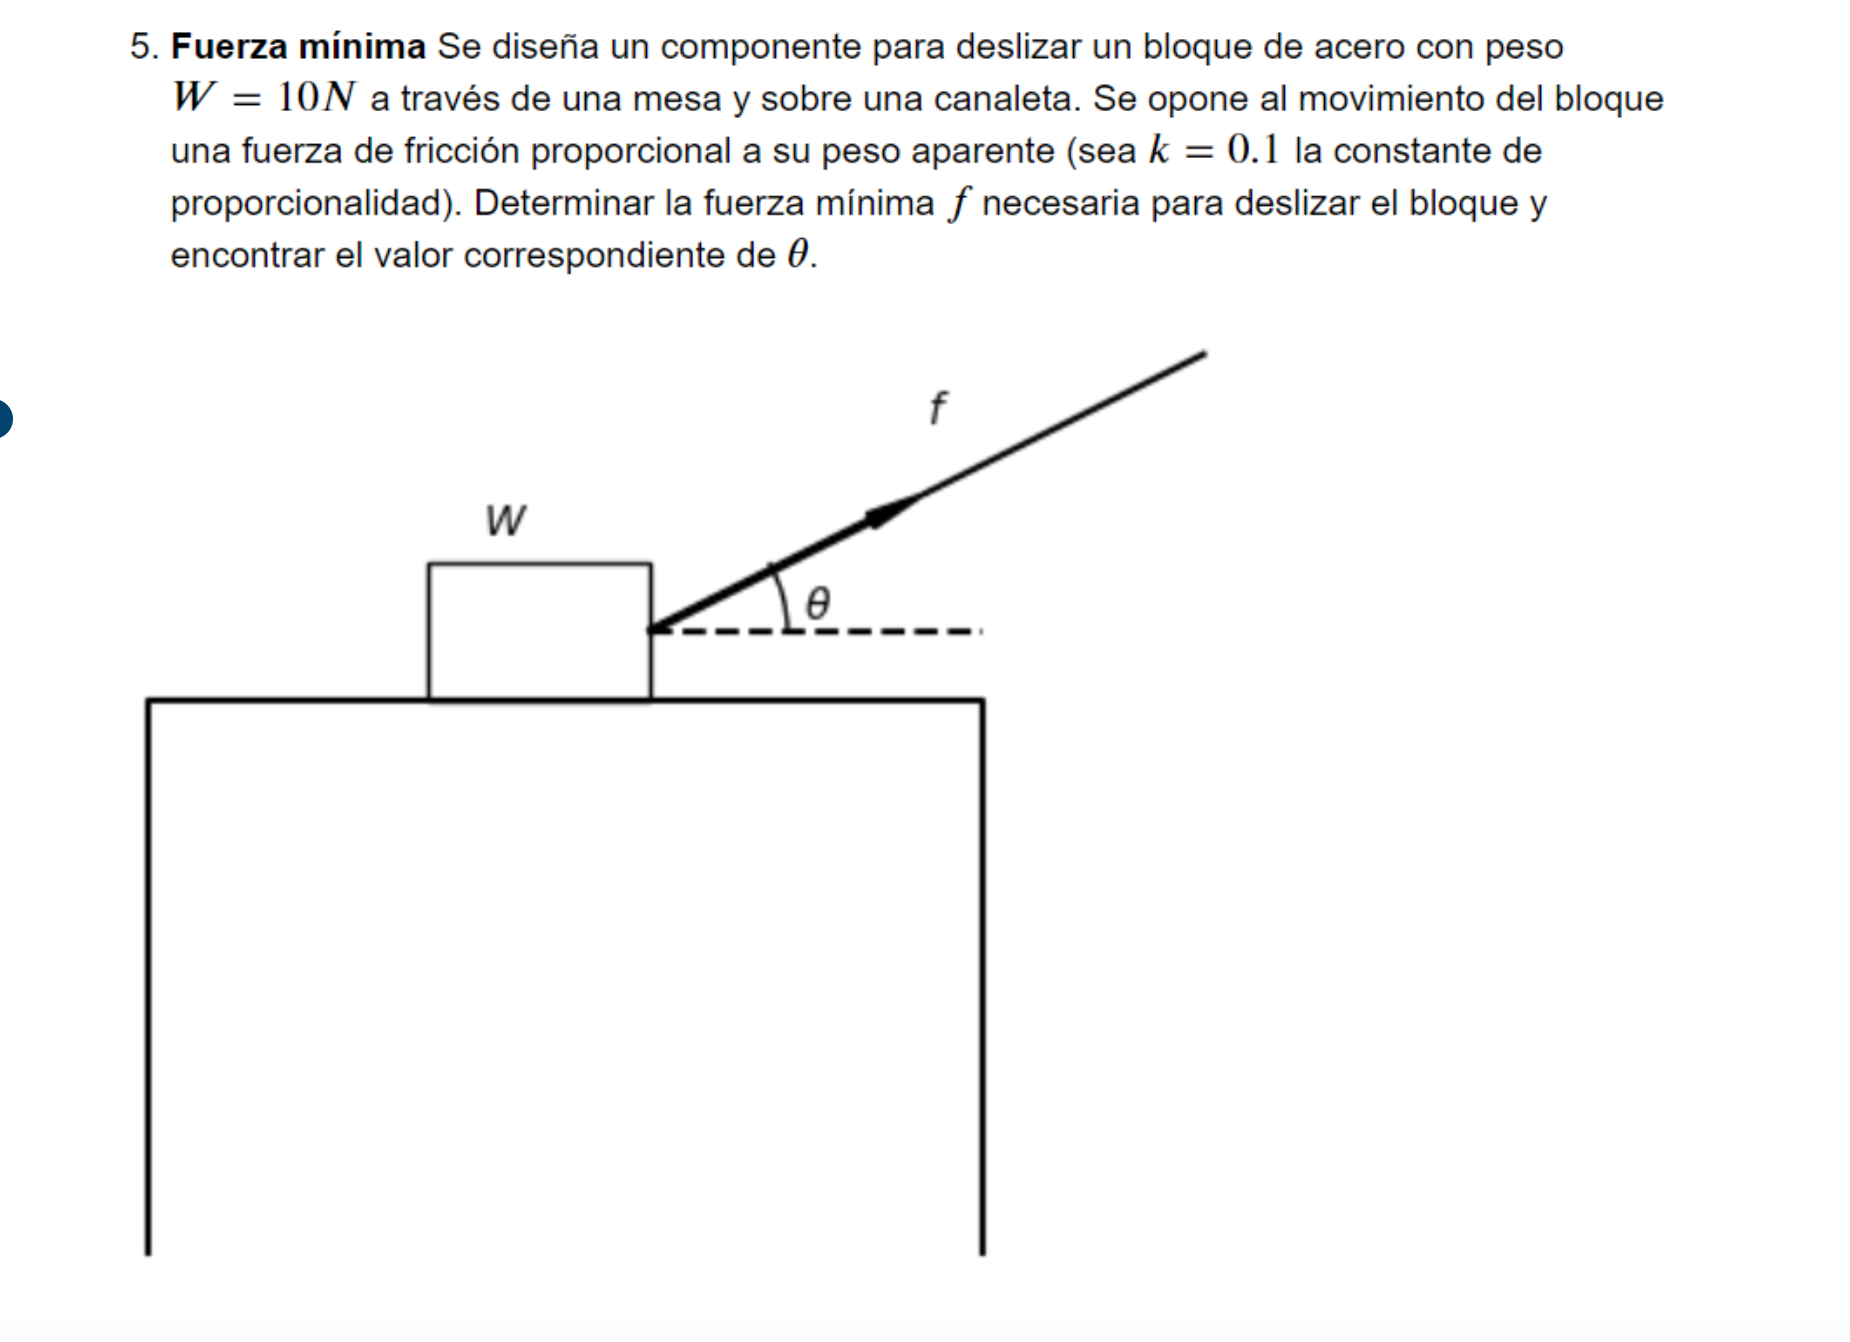

In [476]:
sp.var('theta')
sp.var('k')
sp.var('W')
f=k*W/(sp.cos(theta)+k*sp.sin(theta))
df=sp.diff(f,theta)
c=sp.solve(df,theta)
float(c[0].subs(k,0.1))

0.0996686524911605

In [478]:
f_num=sp.lambdify(theta,f.subs({k:0.1,W:10}),'numpy')
f_num(float(c[0].subs(k,0.1)))

0.9950371902099893

El angulo Tetha = 0.0996, con una f = 0.9950